In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import json
%matplotlib inline

In [2]:
# This might cause issues with your OS and installations of shapely, geos, and proj. 
# Try re-installing anaconda, and then previously mentioned dependencies. Then install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Read the data

In [3]:
modal_profiles = pd.read_csv('./output/single_modal_profile.csv', index_col=0)

In [4]:
line_metadata =  pd.read_csv('./data/line_metadata.csv')
line_metadata = line_metadata.drop(columns='linenum')

In [5]:
# Load conversion guide
with open('./data/conversion_guide.json') as f:
  conversion_guide = json.load(f)

In [6]:
ea = pd.read_csv('./data/ea_cantomtericsmodalprofiles_socialstrain.csv', index_col=0, na_values='NaN', keep_default_na=True).dropna()

## Font Manager

In [7]:
import matplotlib.font_manager

weights = ['ultralight', 'light', 'normal', 'regular', 'book', 'medium', 
           'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 
           'extra bold', 'black']

print('weight'+6*' ', 'file name', '\n'+70*'-')
for weight in weights:
    fprops = matplotlib.font_manager.FontProperties(family='Roboto', 
                                                    weight=weight)
    print(weight+(12-len(weight))*' ', matplotlib.font_manager.findfont(fprops))

weight       file name 
----------------------------------------------------------------------
ultralight   /Library/Fonts/Roboto-Thin.ttf
light        /Library/Fonts/Roboto-Thin.ttf
normal       /Library/Fonts/Roboto-Regular.ttf
regular      /Library/Fonts/Roboto-Regular.ttf
book         /Library/Fonts/Roboto-Regular.ttf
medium       /Library/Fonts/Roboto-Medium.ttf
roman        /Library/Fonts/Roboto-Medium.ttf
semibold     /Library/Fonts/Roboto-Bold.ttf
demibold     /Library/Fonts/Roboto-Bold.ttf
demi         /Library/Fonts/Roboto-Bold.ttf
bold         /Library/Fonts/Roboto-Bold.ttf
heavy        /Library/Fonts/Roboto-Bold.ttf
extra bold   /Library/Fonts/Roboto-Bold.ttf
black        /Library/Fonts/Roboto-Black.ttf


# Plot the data

## Plot EA Data- Embellishment

['Little or no embellishment', 'Slight embellishment', 'Medium or considerable embellishment', 'Much embelishment', 'Extreme embelishment']


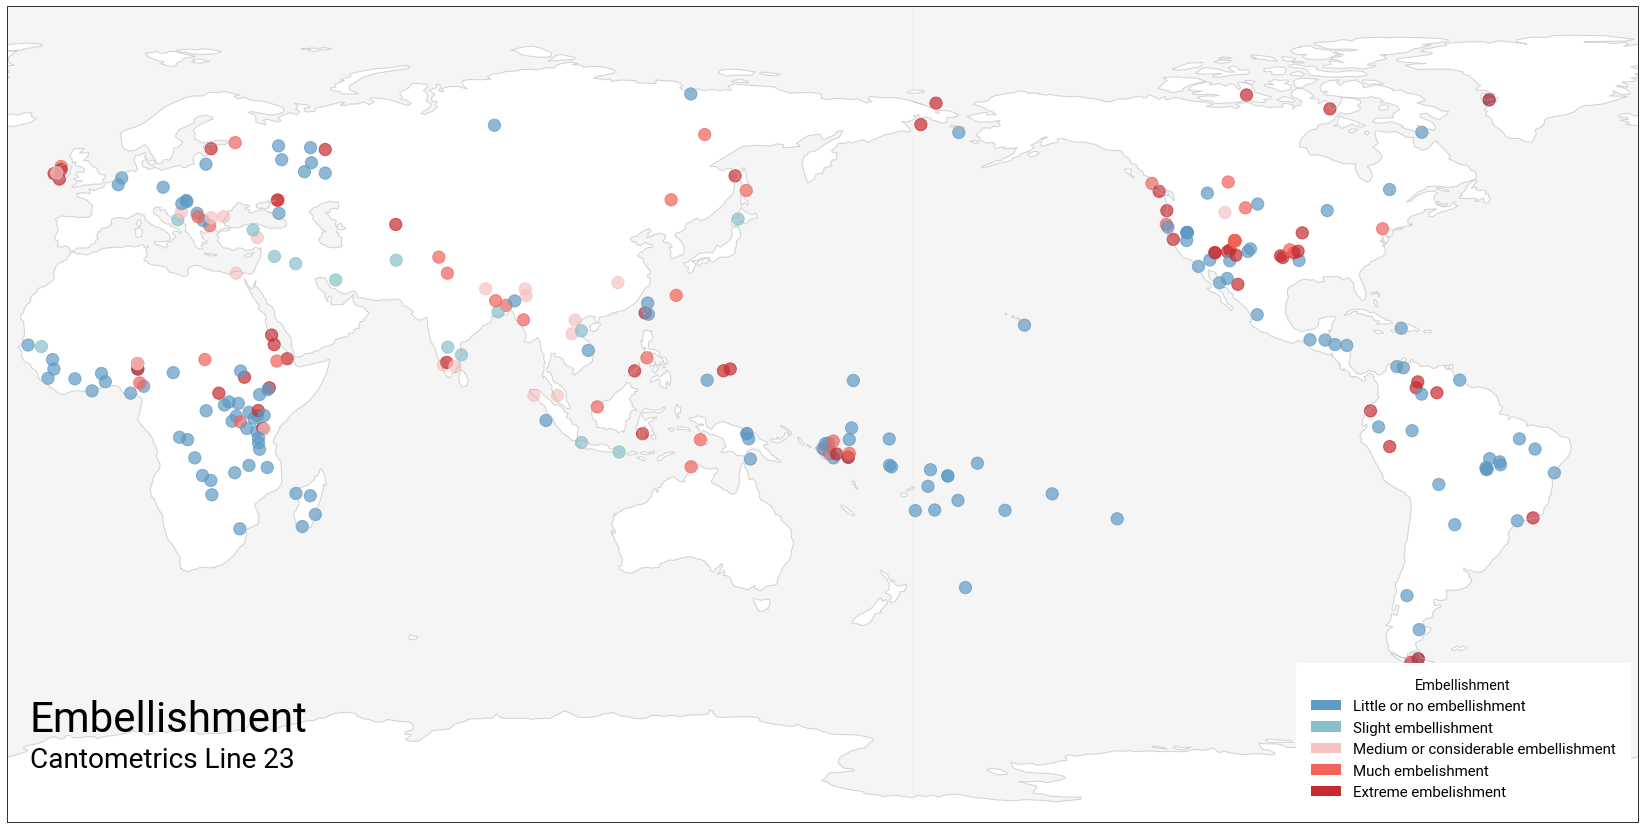

In [16]:
## Drop instances where there is no reading
embellishment = ea[ea.line_23 != 0]

## Map parameters
CENTRAL_LONGITUDE = 160.0
linenum = 23
vname = "Embellishment"
font_family = "Roboto"
alpha = 0.7

## output params
line_title = 'Cantometrics Line '+str(linenum)
column_name = 'line_'+str(linenum)
color_name = 'line'+str(linenum)+'_col'
color_map = {}
variable_name = vname
filename = './figs/'+vname.lower()+'_low.png'

## Project to co-ordinates
x,y = ([] for i in range(2))
for i, row in embellishment['Society_latitude'].iteritems():
    y.append(float(row))
for i, row in embellishment['Society_longitude'].iteritems():
    if float(row)+200 < 345:
        x.append(float(row)+200)
    else:
        x.append((float(row)+200)-345)
        
fig = plt.figure(figsize=(30,15))
projection=ccrs.PlateCarree(central_longitude=CENTRAL_LONGITUDE)
ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.set_global()
ax.text(-175, -70, variable_name, fontsize=42, fontfamily=font_family, color="Black")
ax.text(-175, -78, line_title, fontsize=28, fontfamily=font_family, color="Black")

colors = list(ea.line23_col.unique())
order = [0, 4, 1, 3, 2]
colors = [colors[i] for i in order]

scatter = ax.scatter(x,  y,
           c=embellishment[color_name], 
           alpha=alpha,
           marker='o',
           sizes=(150,150))

label_names = ["Extreme embelishment", "Much embelishment", "Medium or considerable embellishment", 
               "Slight embellishment", "Little or no embellishment"]
label_names.reverse()
patch_1 = mpatches.Circle((0,0), radius=50, fc=colors[0], label=label_names[0])
patch_2 = mpatches.Circle((0,0), radius=50, fc=colors[1], label=label_names[1])
patch_3 = mpatches.Circle((0,0), radius=50, fc=colors[2], label=label_names[2])
patch_4 = mpatches.Circle((0,0), radius=50, fc=colors[3], label=label_names[3])
patch_5 = mpatches.Circle((0,0), radius=50, fc=colors[4], label=label_names[4])

plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5],
                    loc="lower right", 
                    borderpad = 1,
                    framealpha = 1,
                    edgecolor ="none",
                    fontsize=15,
                    title='Embellishment')


ax.add_feature(cfeature.OCEAN, alpha=.6, color="#EFEFEF") 

plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('font',family=font_family, weight='regular')
plt.savefig(filename, bbox_inches = 'tight',pad_inches = 0)

## Plot EA Data - Stratification

In [8]:
ea.stratification_col.unique()

array(['#5E9AC4', '#F1635B', '#F6C3C3', '#C52B2F', '#88C1CA'],
      dtype=object)

,soc_id.strat,xd_id.x,soc_id.canto,pref_name_for_society.x,Glottocode,SocialFactors_V33_code,line_23,line_4,line_22,Society_latitude,Society_longitude,Language_family,line23_col,stratification_col,line4_col,line22_col
3,Ie15,xd791,10033.0,Abelam,ambu1247,1.0,8192.0,128.0,2.0,-4.33,143.25,Ndu,#5E9AC4,#5E9AC4,#88C1CA,#88C1CA
4,Ci12,xd577,10055.0,Abkhaz,abkh1244,4.0,8192.0,8192.0,1024.0,44.32,39.98,Abkhaz-Adyge,#5E9AC4,#F1635B,#C52B2F,#5E9AC4
5,Ee1,xd653,10077.0,Adi,bori1243,3.0,16.0,8192.0,2.0,27.63,94.35,Sino-Tibetan,#F6C3C3,#F6C3C3,#C52B2F,#88C1CA
8,Ie26,xd803,10140.0,Ngarawapum,adze1240,1.0,8192.0,128.0,2.0,-6.39,146.29,Austronesian,#5E9AC4,#5E9AC4,#88C1CA,#88C1CA
9,Ca6,xd454,10143.0,Afar,afar1241,3.0,1024.0,128.0,2.0,12.23,41.81,Afro-Asiatic,#C52B2F,#F6C3C3,#88C1CA,#88C1CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Nd60,xd1197,62526.0,Moache,utee1244,1.0,128.0,16.0,2.0,38.28,-109.01,Uto-Aztecan,#F1635B,#5E9AC4,#F6C3C3,#88C1CA
1021,Nd61,xd1198,62526.0,Taviwatsiu,utee1244,1.0,128.0,16.0,2.0,38.28,-109.01,Uto-Aztecan,#F1635B,#5E9AC4,#F6C3C3,#88C1CA
1022,Nd62,xd1199,62526.0,Uncompahgre Ute,utee1244,1.0,128.0,16.0,2.0,38.28,-109.01,Uto-Aztecan,#F1635B,#5E9AC4,#F6C3C3,#88C1CA
1023,Cb26,xd476,62527.0,Zazzagawa Hausa,araw1280,5.0,128.0,16.0,2.0,11.15,8.78,Afro-Asiatic,#F1635B,#C52B2F,#F6C3C3,#88C1CA


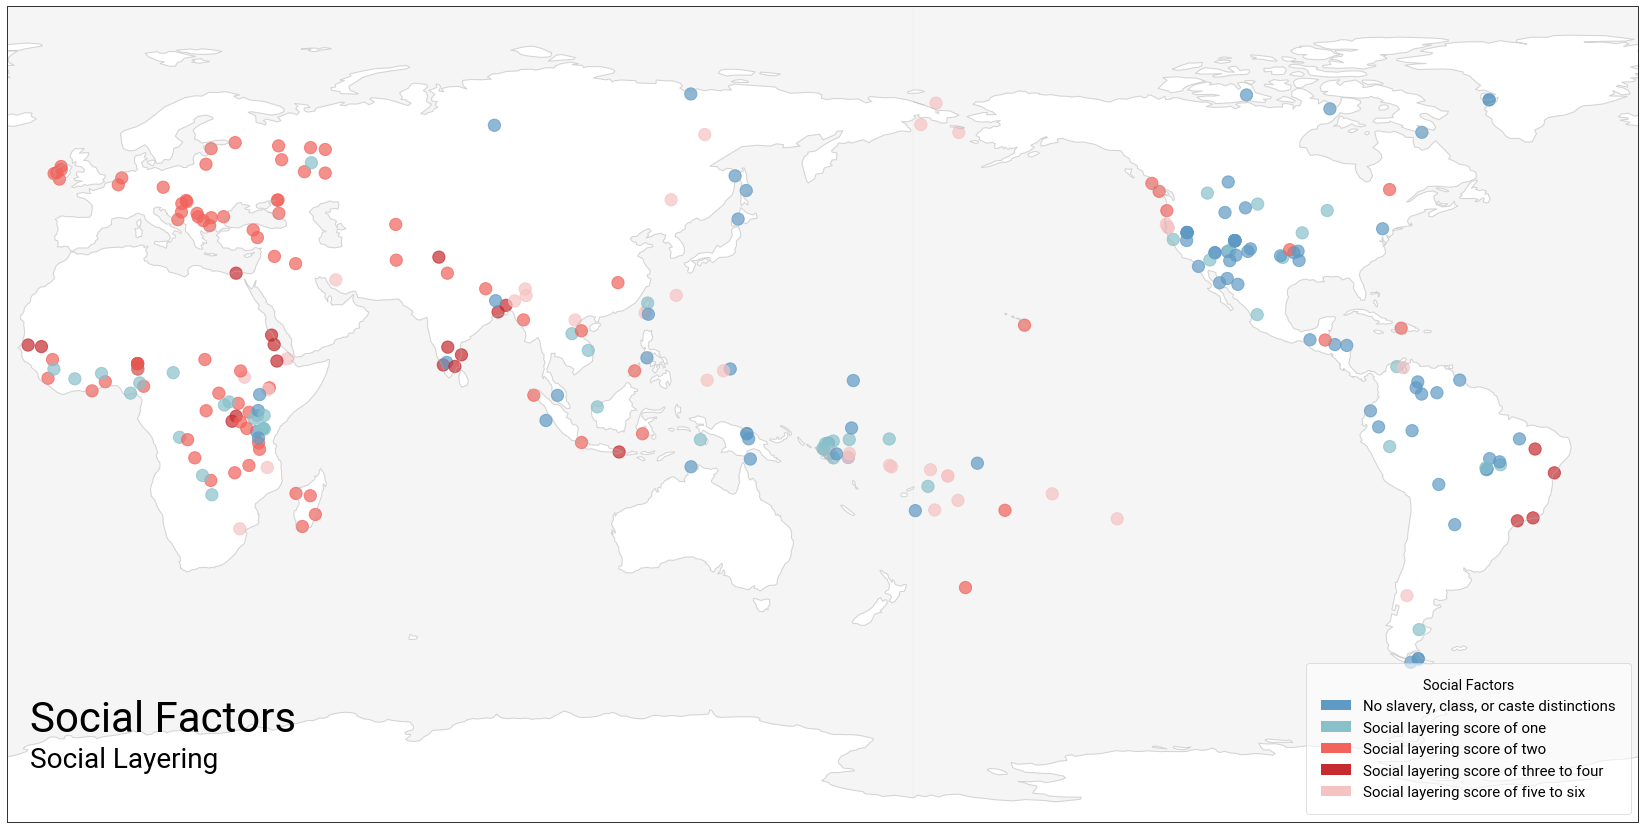

In [15]:
## Drop instances where there is no reading
stratification = ea


## Map parameters
CENTRAL_LONGITUDE = 160.0
vname = "Social Factors"


## output params
line_title = 'Social Layering'
# column_name = 'line_'+str(linenum)
color_name = 'stratification_col'
color_map = {}
variable_name = vname
filename = './figs/'+vname.lower().replace(" ", "_")+'_social_strain.png'
font_family = "Roboto"
weight =  'normal'
alpha = 0.7

## Project to co-ordinates
x,y = ([] for i in range(2))
for i, row in stratification['Society_latitude'].iteritems():
    y.append(float(row))
for i, row in stratification['Society_longitude'].iteritems():
    if float(row)+200 < 345:
        x.append(float(row)+200)
    else:
        x.append((float(row)+200)-345)
        
fig = plt.figure(figsize=(30,15))
projection=ccrs.PlateCarree(central_longitude=CENTRAL_LONGITUDE)
ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.set_global()
ax.text(-175, -70, variable_name, fontsize=42, fontfamily=font_family, color="Black")
ax.text(-175, -78, line_title, fontsize=28, fontfamily=font_family, color="Black")

scatter = ax.scatter(x,  y,
           c=stratification[color_name], 
           alpha=alpha,
           marker='o',
           sizes = (150,150))

label_names = ['No slavery, class, or caste distinctions', 'Social layering score of one', 
               'Social layering score of two','Social layering score of three to four','Social layering score of five to six']

colors = list(ea.stratification_col.unique())
order = [0, 4, 1, 3, 2]
colors = [colors[i] for i in order]

patch_1 = mpatches.Circle((0,0), radius=50, fc=colors[0], label=label_names[0])
patch_2 = mpatches.Circle((0,0), radius=50, fc=colors[1], label=label_names[1])
patch_3 = mpatches.Circle((0,0), radius=50, fc=colors[2], label=label_names[2])
patch_4 = mpatches.Circle((0,0), radius=50, fc=colors[3], label=label_names[3])
patch_5 = mpatches.Circle((0,0), radius=50, fc=colors[4], label=label_names[4])

plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5],
                    loc="lower right", 
                    borderpad = 1,
                    framealpha = 0.6,
                    fontsize=15,
                    title="Social Factors")


ax.add_feature(cfeature.OCEAN, alpha=.6, color="#EFEFEF") 

plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('font',family=font_family, weight=weight)
plt.savefig(filename, bbox_inches = 'tight',pad_inches = 0)

In [21]:
ea[['SocialFactors_V33_code','stratification_col']]

,SocialFactors_V33_code,stratification_col
3,1.0,#5E9AC4
4,4.0,#F1635B
5,3.0,#F6C3C3
8,1.0,#5E9AC4
9,3.0,#F6C3C3
...,...,...
1020,1.0,#5E9AC4
1021,1.0,#5E9AC4
1022,1.0,#5E9AC4
1023,5.0,#C52B2F
